In [3]:
#import dependencies
import pandas as pd
import json
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing and Cleaning Norfolk Adoption Data
    * Check link for csv file: https://data.norfolk.gov/Government/Norfolk-Animal-Care-and-Adoption-Center-NACC-/vfm4-5wv6

In [4]:
#read in csv file
adoption= "Norfolk_Animal.csv"
adoption= pd.read_csv(adoption)
adoption.shape
#adoption.head()
#adoption.dtypes

(29276, 21)

In [5]:
#Converting Intake Date and Outcome Date to pandas date format
adoption['Intake Date'] = pd.to_datetime(adoption['Intake Date'],format='%m/%d/%Y')
adoption['Outcome Date'] = pd.to_datetime(adoption['Outcome Date'],format='%m/%d/%Y')

#adoption.shape
#adoption.dtypes
adoption.head()

,Animal ID,Animal Name,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Tag Number,Intake Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Outcome Date,Intake Month,Intake Day of the Week,Intake Year,Outcome Month,Outcome Day of the Week,Outcome Year
0,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011989,2017-08-16,...,Over the Counter,Adoption,Walk-In,2017-08-19,NaN,NaN,NaN,NaN,NaN,NaN
1,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011502,2017-05-03,...,Over the Counter,Adoption,Walk-In,2017-05-13,NaN,NaN,NaN,NaN,NaN,NaN
2,A000601,SHEILA E,Cat,Spayed Female,0.0,1.8,DOMESTIC SH,CALICO,L16-010051,2016-08-20,...,Transfer,Adoption,Website Information,2016-10-02,NaN,NaN,NaN,NaN,NaN,NaN
3,A001474,CHARLES,Dog,Neutered Male,1.0,0.0,LABRADOR RETR,YELLOW,NaN,2017-04-27,...,Over the Counter,Return to Owner,Walk-In,2017-06-06,NaN,NaN,NaN,NaN,NaN,NaN
4,A001474,CHARLES,Dog,Neutered Male,1.0,0.0,LABRADOR RETR,YELLOW,L16-009301,2016-03-30,...,Animal Cruelty,Return to Owner,NaN,2016-04-15,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Pulling only the columns with outcome type as adoption
adoption= adoption.loc[adoption['Outcome Type'] == 'Adoption']
adoption.head()
#adoption.dtypes

,Animal ID,Animal Name,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Tag Number,Intake Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Outcome Date,Intake Month,Intake Day of the Week,Intake Year,Outcome Month,Outcome Day of the Week,Outcome Year
0,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011989,2017-08-16,...,Over the Counter,Adoption,Walk-In,2017-08-19,NaN,NaN,NaN,NaN,NaN,NaN
1,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011502,2017-05-03,...,Over the Counter,Adoption,Walk-In,2017-05-13,NaN,NaN,NaN,NaN,NaN,NaN
2,A000601,SHEILA E,Cat,Spayed Female,0.0,1.8,DOMESTIC SH,CALICO,L16-010051,2016-08-20,...,Transfer,Adoption,Website Information,2016-10-02,NaN,NaN,NaN,NaN,NaN,NaN
17,A002987,ENZO,Dog,Neutered Male,1.0,0.0,PIT BULL,BLACK,L17-011517,2017-04-30,...,Over the Counter,Adoption,Walk-In,2017-05-16,NaN,NaN,NaN,NaN,NaN,NaN
28,A006357,SKIPPY,Dog,Neutered Male,5.0,0.0,BEAGLE,TRICOLOR,982000123128327,2016-05-03,...,Over the Counter,Adoption,NaN,2016-05-18,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Adding outcome month and outcome year as additional columns
adoption['Outcome Month'] = adoption['Outcome Date'].map(lambda x: x.strftime('%m'))
adoption['Outcome Year'] = adoption['Outcome Date'].map(lambda x: x.strftime('%Y'))
adoption.head()

,Animal ID,Animal Name,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Tag Number,Intake Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Outcome Date,Intake Month,Intake Day of the Week,Intake Year,Outcome Month,Outcome Day of the Week,Outcome Year
0,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011989,2017-08-16,...,Over the Counter,Adoption,Walk-In,2017-08-19,NaN,NaN,NaN,08,NaN,2017
1,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011502,2017-05-03,...,Over the Counter,Adoption,Walk-In,2017-05-13,NaN,NaN,NaN,05,NaN,2017
2,A000601,SHEILA E,Cat,Spayed Female,0.0,1.8,DOMESTIC SH,CALICO,L16-010051,2016-08-20,...,Transfer,Adoption,Website Information,2016-10-02,NaN,NaN,NaN,10,NaN,2016
17,A002987,ENZO,Dog,Neutered Male,1.0,0.0,PIT BULL,BLACK,L17-011517,2017-04-30,...,Over the Counter,Adoption,Walk-In,2017-05-16,NaN,NaN,NaN,05,NaN,2017
28,A006357,SKIPPY,Dog,Neutered Male,5.0,0.0,BEAGLE,TRICOLOR,982000123128327,2016-05-03,...,Over the Counter,Adoption,NaN,2016-05-18,NaN,NaN,NaN,05,NaN,2016


In [8]:
#Pulling out only the columns relevant for our research
norfolk_df= adoption[["Animal ID","Animal Type","Sex", "Years Old","Months Old","Primary Breed", "Primary Color","Intake Type","Intake Date","Outcome Type","Outcome Date","Outcome Month","Outcome Year"]]
norfolk_df.head()

,Animal ID,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Intake Type,Intake Date,Outcome Type,Outcome Date,Outcome Month,Outcome Year
0,A000455,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,Return,2017-08-16,Adoption,2017-08-19,08,2017
1,A000455,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,Owner Surrendered,2017-05-03,Adoption,2017-05-13,05,2017
2,A000601,Cat,Spayed Female,0.0,1.8,DOMESTIC SH,CALICO,Transfer,2016-08-20,Adoption,2016-10-02,10,2016
17,A002987,Dog,Neutered Male,1.0,0.0,PIT BULL,BLACK,Stray,2017-04-30,Adoption,2017-05-16,05,2017
28,A006357,Dog,Neutered Male,5.0,0.0,BEAGLE,TRICOLOR,Owner Surrendered,2016-05-03,Adoption,2016-05-18,05,2016


# Importing and Cleaning COVID Data for Norfolk,VA

In [9]:
# URL for GET requests to retrieve COVID data for Norfolk, VA
url = "https://data.virginia.gov/resource/bre9-aqqr.json?locality=Norfolk"
response = requests.get(url)

# Print status code
print(response.status_code)

200


In [10]:
# Retrieving data and converting it into JSON
requests.get(url).json()
data = response.json()
#print(json.dumps(data, indent=4))

In [11]:
#converting from json to a dataframe
COVID_df = pd.DataFrame(data)
COVID_df.head()

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths
0,2020-12-12T00:00:00.000,51710,Norfolk,Norfolk,7331,509,99
1,2020-12-11T00:00:00.000,51710,Norfolk,Norfolk,7250,502,99
2,2020-12-10T00:00:00.000,51710,Norfolk,Norfolk,7176,503,99
3,2020-12-09T00:00:00.000,51710,Norfolk,Norfolk,7106,490,98
4,2020-12-08T00:00:00.000,51710,Norfolk,Norfolk,7038,483,98


# Analyzing Norfolk Adoption Data:

In [12]:
norfolk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 29271
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Animal ID      10842 non-null  object        
 1   Animal Type    10842 non-null  object        
 2   Sex            10842 non-null  object        
 3   Years Old      6640 non-null   float64       
 4   Months Old     6799 non-null   float64       
 5   Primary Breed  10842 non-null  object        
 6   Primary Color  10842 non-null  object        
 7   Intake Type    10842 non-null  object        
 8   Intake Date    10842 non-null  datetime64[ns]
 9   Outcome Type   10842 non-null  object        
 10  Outcome Date   10842 non-null  datetime64[ns]
 11  Outcome Month  10842 non-null  object        
 12  Outcome Year   10842 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 1.2+ MB


In [13]:
#grouping by year to see if the data is complete 
group= norfolk_df.groupby(['Outcome Year'])
year= group.count()
year

,Animal ID,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Intake Type,Intake Date,Outcome Type,Outcome Date,Outcome Month
Outcome Year,,,,,,,,,,,,
2015,223,223,223,223,223,223,223,223,223,223,223,223
2016,2391,2391,2391,2391,2390,2391,2391,2391,2391,2391,2391,2391
2017,2240,2240,2240,1214,1208,2240,2240,2240,2240,2240,2240,2240
2018,2195,2195,2195,1045,1088,2195,2195,2195,2195,2195,2195,2195
2019,2239,2239,2239,1010,1160,2239,2239,2239,2239,2239,2239,2239
2020,1554,1554,1554,757,730,1554,1554,1554,1554,1554,1554,1554


In [14]:
#Pulling data for year 2018
year1_df = norfolk_df.loc[norfolk_df['Outcome Year'] == '2018']
year1_adoptions = year1_df["Outcome Month"].value_counts()
year1_adoptions

08    259
12    231
06    211
07    195
05    186
10    185
11    181
03    172
09    161
04    156
02    139
01    119
Name: Outcome Month, dtype: int64

In [15]:
#Pulling data for year 2019
year2_df = norfolk_df.loc[norfolk_df['Outcome Year'] == '2019']
year2_adoptions = year2_df["Outcome Month"].value_counts()
year2_adoptions

08    252
10    250
07    249
06    190
09    189
05    185
11    181
12    174
01    157
04    140
02    136
03    136
Name: Outcome Month, dtype: int64

In [16]:
#Pulling data for year 2020
year3_df = norfolk_df.loc[norfolk_df['Outcome Year'] == '2020']
year3_adoptions = year3_df["Outcome Month"].value_counts()
year3_adoptions

11    186
07    173
01    167
03    164
08    154
02    154
10    154
09    148
06    110
04     80
05     64
Name: Outcome Month, dtype: int64

In [17]:
#saving years 2018 through 2020 as a df
adoption_by_month = pd.DataFrame({
    "2018": year1_adoptions,
    "2019": year2_adoptions,
    "2020": year3_adoptions
})
adoption_by_month= adoption_by_month.fillna(0)
adoption_by_month

,2018,2019,2020
01,119,157,167.0
02,139,136,154.0
03,172,136,164.0
04,156,140,80.0
05,186,185,64.0
06,211,190,110.0
07,195,249,173.0
08,259,252,154.0
09,161,189,148.0
10,185,250,154.0


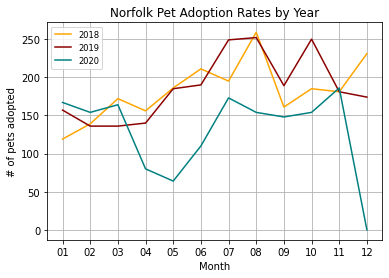

In [18]:
#plotting a line graph that shows adoption rates in years 2018 to 2020
fig = plt.figure()
ax=fig.add_subplot(111)

ax.plot()
ax.plot(adoption_by_month.index,adoption_by_month["2018"],color = 'orange',label = '2018')
ax.plot(adoption_by_month.index,adoption_by_month["2019"],color="darkred", label='2019' )
ax.plot(adoption_by_month.index,adoption_by_month["2020"],color="teal", label='2020')
#plt.plot(adoption_by_month['Year'],adoption_by_month['Number of Adoptions'],color="r", marker="o", markersize=7, linestyle="dashed", linewidth=1)

plt.xlabel('Month')
plt.ylabel('# of pets adopted')
plt.title("Norfolk Pet Adoption Rates by Year")
#plt.legend(handles=('2018', '2019','2020'), loc="best")

plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)

#saving the figure
plt.savefig("Norfolk Adoption Rates by Year.png")

We notice that adoption rates are lower in 2020 compared to previous years.

# Analyzing COVID Data

In [19]:
#COVID_df.dtypes
COVID_df['Outcome Dates'] = pd.to_datetime(COVID_df['report_date'],format='%Y/%m/%d')
COVID_df['Outcome Month'] = COVID_df['Outcome Dates'].map(lambda x: x.strftime('%m'))
COVID_df

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths,Outcome Dates,Outcome Month
0,2020-12-12T00:00:00.000,51710,Norfolk,Norfolk,7331,509,99,2020-12-12,12
1,2020-12-11T00:00:00.000,51710,Norfolk,Norfolk,7250,502,99,2020-12-11,12
2,2020-12-10T00:00:00.000,51710,Norfolk,Norfolk,7176,503,99,2020-12-10,12
3,2020-12-09T00:00:00.000,51710,Norfolk,Norfolk,7106,490,98,2020-12-09,12
4,2020-12-08T00:00:00.000,51710,Norfolk,Norfolk,7038,483,98,2020-12-08,12
...,...,...,...,...,...,...,...,...,...
266,2020-11-23T00:00:00.000,51710,Norfolk,Norfolk,6297,439,88,2020-11-23,11
267,2020-11-24T00:00:00.000,51710,Norfolk,Norfolk,6344,442,89,2020-11-24,11
268,2020-11-25T00:00:00.000,51710,Norfolk,Norfolk,6378,456,89,2020-11-25,11
269,2020-11-26T00:00:00.000,51710,Norfolk,Norfolk,6401,457,89,2020-11-26,11


Pulling the total number of cases for each month

In [20]:
covid_group = COVID_df.groupby(['Outcome Month'])
covid_max_df=covid_group['total_cases'].max()
covid_max_df


COVID_by_month = pd.DataFrame({
    "# of Cases": covid_max_df
   
})
COVID_by_month

,# of Cases
Outcome Month,
03,8
04,99
05,503
06,915
07,987
08,4394
09,4881
10,5493
11,6528


Plotting the cuminlative COVID cases

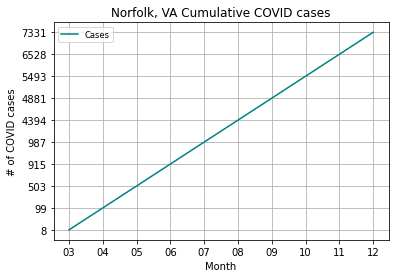

In [21]:
plt.plot(COVID_by_month.index,COVID_by_month['# of Cases'],color = 'teal',label = 'Cases')

plt.xlabel('Month')
plt.ylabel('# of COVID cases')
plt.title("Norfolk, VA Cumulative COVID cases")

plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)

plt.savefig("Norfolk, VA Cumulative COVID cases")

Plotting the delta number of cases month over month

In [22]:
COVID_by_month['# of Cases'] = COVID_by_month['# of Cases'].astype(int)

COVID_diff = COVID_by_month['# of Cases'].diff().fillna(0)

COVID_diff

COVID_per_month = pd.DataFrame({"# of Cases": COVID_diff,
                              "Month": COVID_diff.index})
COVID_per_month

,# of Cases,Month
Outcome Month,,
03,0.0,03
04,91.0,04
05,404.0,05
06,412.0,06
07,72.0,07
08,3407.0,08
09,487.0,09
10,612.0,10
11,1035.0,11


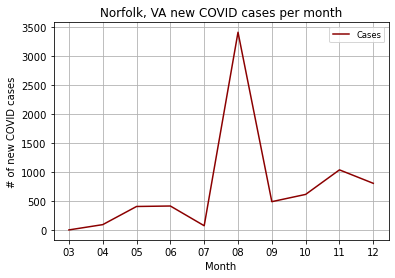

In [23]:
plt.plot(COVID_per_month.index,COVID_per_month['# of Cases'],color = 'darkred',label = 'Cases')


plt.xlabel('Month')
plt.ylabel('# of new COVID cases')
plt.title("Norfolk, VA new COVID cases per month")

plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)

plt.savefig("Norfolk, VA new COVID cases per month")

In [24]:
#Plot adoption data and COVID cases side-by-side
#fig = plt.figure()

#ax = plt.subplot(111)
#ax.bar(adoption_by_month.index,adoption_by_month['2020'], width=0.5, color='b', align='center', label = 'adoptions')
#ax.bar(COVID_per_month.index,COVID_per_month['# of Cases'], width=0.5, color='g', align='center',label='COVID cases')
#ax.autoscale(tight=True)
#plt.xlabel('Month')
#plt.ylabel('# of pets adopted')
#plt.title("Adoption vs COVID cases Comparison")
#plt.legend(handles=('2018', '2019','2020'), loc="best")
#fig.tight_layout()
#plt.legend(loc="best",fontsize="small",fancybox=True)
#plt.grid(True)
#plt.show()

Plotting a scatter plot of Norfolk COVID cases vs Norfolk pet adoption

In [25]:
new_row = pd.DataFrame({"# of Cases": 0,"Month": "02"},index =[0])

# simply concatenate both dataframes 
COVID_per_month = pd.concat([new_row, COVID_per_month]).reset_index(drop = True) 
new_row = pd.DataFrame({"# of Cases": 0,"Month": "01"},index =[0])

# simply concatenate both dataframes 
COVID_per_month = pd.concat([new_row, COVID_per_month]).reset_index(drop = True) 

COVID_per_month

,# of Cases,Month
0,0.0,01
1,0.0,02
2,0.0,03
3,91.0,04
4,404.0,05
5,412.0,06
6,72.0,07
7,3407.0,08
8,487.0,09
9,612.0,10


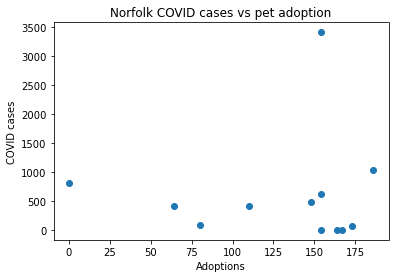

In [65]:
plt.scatter(adoption_by_month['2020'],COVID_per_month['# of Cases'],marker='o')


plt.xlabel("Adoptions")
plt.ylabel("COVID cases")

plt.title("Norfolk COVID cases vs pet adoption")

plt.savefig("Norfolk COVID cases vs pet adoption.png")

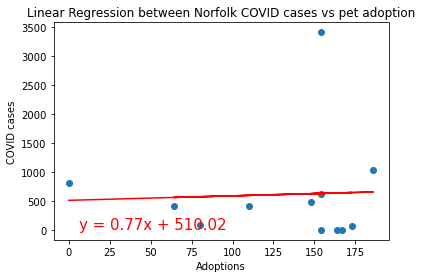

In [64]:
x_values = adoption_by_month['2020']
y_values = COVID_per_month['# of Cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Adoptions')
plt.ylabel('COVID cases')

plt.title("Linear Regression between Norfolk COVID cases vs pet adoption")


plt.savefig("Linear Regression, Norfolk.png")

In [61]:
print(f"The correlation coefficient between pet adoptions and COVID cases in Norfolk {round(st.pearsonr(adoption_by_month['2020'],COVID_per_month['# of Cases'])[0],2)}")

The correlation coefficient between pet adoptions and COVID cases in Norfolk 0.05


Analysis:
* Checking the assumptions related to t-test

In [27]:
population1= adoption_by_month['2020'].mean()
population2= COVID_per_month['# of Cases'].mean()

population1_std= np.std(adoption_by_month['2020'])
population2_std= np.std(COVID_per_month['# of Cases'])

population1_std, population2_std

(53.005502858979966, 904.2934742106679)

NormaltestResult(statistic=6.020364134826666, pvalue=0.04928270516893548)


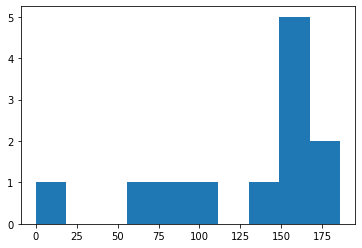

In [28]:
plt.hist(adoption_by_month['2020'])
print(st.normaltest(adoption_by_month['2020']))

NormaltestResult(statistic=24.253745253247878, pvalue=5.4121040252237996e-06)


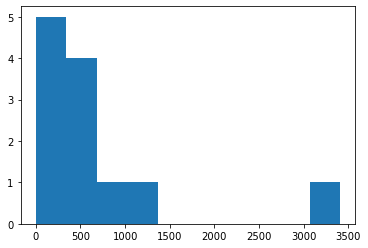

In [29]:
plt.hist(COVID_per_month['# of Cases'])
print(st.normaltest(COVID_per_month['# of Cases']))

In [30]:
st.ttest_ind(adoption_by_month['2020'],COVID_per_month['# of Cases'],equal_var= False)

Ttest_indResult(statistic=-1.7601977077903639, pvalue=0.10592615646154367)

With the pvalue of 11.7%, we fail to reject the null hypothesis (there is no correlation between COVID positive cases and pet adoption rates). 

The mean and the standard deviations for population 1 (adoption rates in 2020) and population 2(COVID cases) are significantly different from each other. 

Both datasets are not normally distributed,and the standard deviations are not roughly equal, therefore the assumption related to a t-test are not valid for these datasets.

# Importing and Cleaning Dallas Adoption Data

In [31]:
adoption= "Dallas_adoption.csv"
Dallas_adoption= pd.read_csv(adoption)
Dallas_adoption.head()
#Dallas_adoption.shape
#Dallas_adoption.dtypes

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,NaN,NaN,1,P0098773,006301,...,11:31:00,R19-558731,K19-486742,NaN,APP SICK,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020
1,A0442587,DOG,TERRIER MIX,FREEZER,IMPOUNDED,NaN,NaN,1,P0492284,007102,...,00:00:00,NaN,K19-486954,NaN,DEAD,SCAN CHIP,OVER THE COUNTER,NaN,NOV.2019,FY2020
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,NaN,A19-195601,1,P9991718,004600,...,13:36:00,NaN,K19-482022,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,NaN,OCT.2019,FY2020
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,NaN,A19-196573,1,P0903792,016605,...,17:35:00,NaN,K19-483073,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,SWEEP,TAGGED,OCT.2019,FY2020
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,NaN,NaN,1,P0890077,006900,...,12:57:00,R19-558750,K19-486694,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020


In [32]:
#Pulling out only the columns relevant for our research
Dallas_df= Dallas_adoption[['Animal Type',"Animal Breed","Outcome Type","Outcome Date"]]
Dallas_df.head()

,Animal Type,Animal Breed,Outcome Type,Outcome Date
0,DOG,HAVANESE,RETURNED TO OWNER,11/09/2019
1,DOG,TERRIER MIX,DEAD ON ARRIVAL,11/10/2019
2,DOG,CATAHOULA,RETURNED TO OWNER,10/03/2019
3,DOG,GERM SHEPHERD,TRANSFER,10/15/2019
4,DOG,SILKY TERRIER,RETURNED TO OWNER,11/09/2019


In [33]:
Dallas_df['Outcome Date'] = pd.to_datetime(Dallas_df['Outcome Date'],format='%m/%d/%Y')
Dallas_df.head()

,Animal Type,Animal Breed,Outcome Type,Outcome Date
0,DOG,HAVANESE,RETURNED TO OWNER,2019-11-09
1,DOG,TERRIER MIX,DEAD ON ARRIVAL,2019-11-10
2,DOG,CATAHOULA,RETURNED TO OWNER,2019-10-03
3,DOG,GERM SHEPHERD,TRANSFER,2019-10-15
4,DOG,SILKY TERRIER,RETURNED TO OWNER,2019-11-09


In [34]:
Dallas_df = Dallas_df.loc[Dallas_df['Outcome Type'] == 'ADOPTION']
Dallas_df.head()

,Animal Type,Animal Breed,Outcome Type,Outcome Date
16,DOG,CHIHUAHUA SH,ADOPTION,2019-10-30
19,DOG,GERM SHEPHERD,ADOPTION,2019-11-20
23,DOG,LHASA APSO,ADOPTION,2019-11-03
25,DOG,BOXER,ADOPTION,2019-10-16
26,DOG,BOXER,ADOPTION,2019-11-16


In [35]:
Dallas_df= Dallas_df.dropna()
Dallas_df['Outcome Month'] = Dallas_df['Outcome Date'].map(lambda x: x.strftime('%m'))
Dallas_df['Outcome Year'] = Dallas_df['Outcome Date'].map(lambda x: x.strftime('%Y'))
Dallas_df.head()

,Animal Type,Animal Breed,Outcome Type,Outcome Date,Outcome Month,Outcome Year
16,DOG,CHIHUAHUA SH,ADOPTION,2019-10-30,10,2019
19,DOG,GERM SHEPHERD,ADOPTION,2019-11-20,11,2019
23,DOG,LHASA APSO,ADOPTION,2019-11-03,11,2019
25,DOG,BOXER,ADOPTION,2019-10-16,10,2019
26,DOG,BOXER,ADOPTION,2019-11-16,11,2019


In [36]:
#Pulling data for year 2018. There is no data for the year 2018
Dallas_2018 = Dallas_df.loc[Dallas_df['Outcome Year'] == '2018']
Dallas_2018_adoptions = Dallas_2018["Outcome Month"].value_counts()
Dallas_2018_adoptions

Series([], Name: Outcome Month, dtype: int64)

In [37]:
#Pulling data for year 2019
Dallas_2019 = Dallas_df.loc[Dallas_df['Outcome Year'] == '2019']
Dallas_2019_adoptions = Dallas_2019["Outcome Month"].value_counts()
Dallas_2019_adoptions

12    1419
11    1359
10     941
Name: Outcome Month, dtype: int64

In [38]:
#Pulling data for year 2020
Dallas_2020 = Dallas_df.loc[Dallas_df['Outcome Year'] == '2020']
Dallas_2020_adoptions = Dallas_2020["Outcome Month"].value_counts()
Dallas_2020_adoptions

01    1314
02    1140
03     922
08     606
06     550
07     546
09     530
05     405
04     292
10      63
Name: Outcome Month, dtype: int64

In [53]:
#Saving adoption data for 2019 and 2020 into a df 
Dallas_by_month = pd.DataFrame({
    "2019": Dallas_2019_adoptions,
    "2020": Dallas_2020_adoptions
})

Dallas_by_month= Dallas_by_month.fillna(0)
Dallas_by_month

,2019,2020
01,0.0,1314.0
02,0.0,1140.0
03,0.0,922.0
04,0.0,292.0
05,0.0,405.0
06,0.0,550.0
07,0.0,546.0
08,0.0,606.0
09,0.0,530.0
10,941.0,63.0


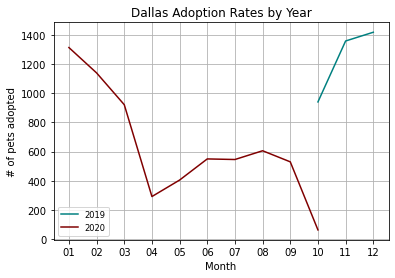

In [52]:
#plotting a line graph that shows adoption rates in years 2019 and 2020
fig = plt.figure()
ax=fig.add_subplot(111)

ax.plot()
ax.plot(Dallas_by_month.index,Dallas_by_month["2019"],color="teal", label='2019' )
ax.plot(Dallas_by_month.index,Dallas_by_month["2020"],color="maroon", label='2020')

plt.xlabel('Month')
plt.ylabel('# of pets adopted')
plt.title("Dallas Adoption Rates by Year")

plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)

plt.savefig("Dallas Adoption Rates by Year.png")

# Importing and Cleaning Dallas COVID Data

In [41]:
COVID= "us_counties.csv"
Dallas_COVID= pd.read_csv(COVID)
Dallas_COVID.head()
#adoption.shape
#Dallas_adoption.dtypes

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [42]:
Dallas_COVID= Dallas_COVID.loc[Dallas_COVID['state']== 'Texas']
Dallas_COVID.head()

,date,county,state,fips,cases,deaths
143,2020-02-12,Bexar,Texas,48029.0,1,0.0
154,2020-02-13,Bexar,Texas,48029.0,2,0.0
165,2020-02-14,Bexar,Texas,48029.0,2,0.0
176,2020-02-15,Bexar,Texas,48029.0,2,0.0
187,2020-02-16,Bexar,Texas,48029.0,2,0.0


In [43]:
Dallas_COVID= Dallas_COVID.loc[Dallas_COVID['county']== 'Dallas']
Dallas_COVID.head()

,date,county,state,fips,cases,deaths
1133,2020-03-10,Dallas,Texas,48113.0,2,0.0
1329,2020-03-11,Dallas,Texas,48113.0,3,0.0
1576,2020-03-12,Dallas,Texas,48113.0,8,0.0
1881,2020-03-13,Dallas,Texas,48113.0,9,0.0
2247,2020-03-14,Dallas,Texas,48113.0,11,0.0


In [44]:
Dallas_COVID['date'] = pd.to_datetime(Dallas_COVID['date'],format='%Y/%m/%d')
Dallas_COVID['Month'] = Dallas_COVID['date'].map(lambda x: x.strftime('%m'))
Dallas_COVID['Year'] = Dallas_COVID['date'].map(lambda x: x.strftime('%Y'))
Dallas_COVID.head()

,date,county,state,fips,cases,deaths,Month,Year
1133,2020-03-10,Dallas,Texas,48113.0,2,0.0,03,2020
1329,2020-03-11,Dallas,Texas,48113.0,3,0.0,03,2020
1576,2020-03-12,Dallas,Texas,48113.0,8,0.0,03,2020
1881,2020-03-13,Dallas,Texas,48113.0,9,0.0,03,2020
2247,2020-03-14,Dallas,Texas,48113.0,11,0.0,03,2020


In [45]:
dallas_group = Dallas_COVID.groupby(['Month'])
dallas_max=dallas_group['cases'].max()
dallas_max


Dallas_by_month = pd.DataFrame({
    "cases": dallas_max
   
})
Dallas_by_month

,cases
Month,
03,631
04,3531
05,10234
06,21338
07,51299
08,74576
09,86500
10,102642
11,138798


In [46]:
Dallas_by_month['cases'] = Dallas_by_month['cases'].astype(int)

Dallas_diff = Dallas_by_month['cases'].diff().fillna(0)

Dallas_diff

Dallas_per_month = pd.DataFrame({"cases": Dallas_diff,
                              "Month": Dallas_diff.index})
Dallas_per_month

,cases,Month
Month,,
03,0.0,03
04,2900.0,04
05,6703.0,05
06,11104.0,06
07,29961.0,07
08,23277.0,08
09,11924.0,09
10,16142.0,10
11,36156.0,11


Plotting the delta number of cases month over month

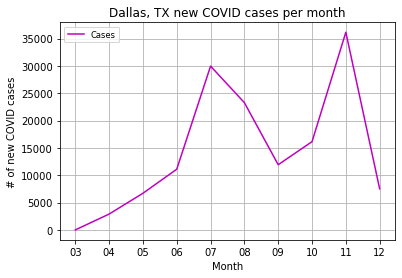

In [47]:
plt.plot(Dallas_per_month.index,Dallas_per_month['cases'],color = 'm',label = 'Cases')


plt.xlabel('Month')
plt.ylabel('# of new COVID cases')
plt.title("Dallas, TX new COVID cases per month")

plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)

plt.savefig("Dallas, TX new COVID cases per month.png")

In [48]:
new_row = pd.DataFrame({"cases": 0,"Month": "02"},index =[0])

# simply concatenate both dataframes 
Dallas_per_month = pd.concat([new_row, Dallas_per_month]).reset_index(drop = True) 
new_row = pd.DataFrame({"cases": 0,"Month": "01"},index =[0])

# simply concatenate both dataframes 
Dallas_per_month = pd.concat([new_row, Dallas_per_month]).reset_index(drop = True) 

Dallas_per_month

,cases,Month
0,0.0,01
1,0.0,02
2,0.0,03
3,2900.0,04
4,6703.0,05
5,11104.0,06
6,29961.0,07
7,23277.0,08
8,11924.0,09
9,16142.0,10


Plotting a scatter plot of Dallas COVID cases vs Dallas pet adoption

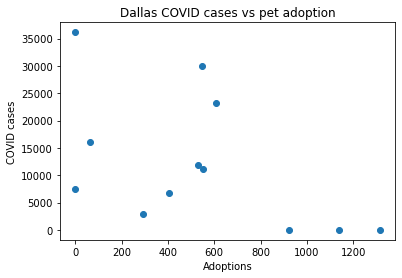

In [66]:
plt.scatter(Dallas_by_month['2020'],Dallas_per_month['cases'])


plt.xlabel("Adoptions")
plt.ylabel("COVID cases")
plt.title("Dallas COVID cases vs pet adoption")


plt.savefig("Dallas COVID cases vs pet adoption.png")

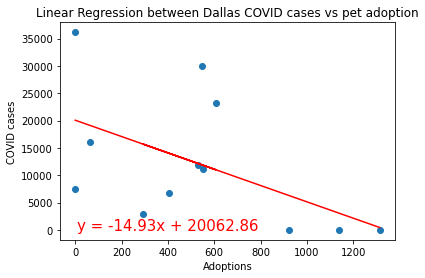

In [63]:
x_values = Dallas_by_month['2020']
y_values = Dallas_per_month['cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Adoptions')
plt.ylabel('COVID cases')

plt.title("Linear Regression between Dallas COVID cases vs pet adoption")


plt.savefig("Linear Regression Dallas.png")

In [62]:
print(f"The correlation coefficient between pet adoptions and COVID cases in Dallas {round(st.pearsonr(Dallas_by_month['2020'],Dallas_per_month['cases'])[0],2)}")

The correlation coefficient between pet adoptions and COVID cases in Dallas -0.53


In [67]:
Dallas_pop= np.std(Dallas_by_month['2020'])
Dallas_pop2= np.std(Dallas_per_month['cases'])

Dallas_pop, Dallas_pop2

(408.14669203880874, 11597.155930981527)

In [68]:
st.ttest_ind(Dallas_by_month['2020'],Dallas_per_month['cases'],equal_var= False)

Ttest_indResult(statistic=-3.3182674870712097, pvalue=0.006830329816449098)

With the pvalue of 0.68%, we reject the null hypothesis (there is a correlation between COVID positive cases and pet adoption rates in Dallas). 

Plotting a scatter plot of COVID cases and pet adoptions for both Norfolk and Dallas

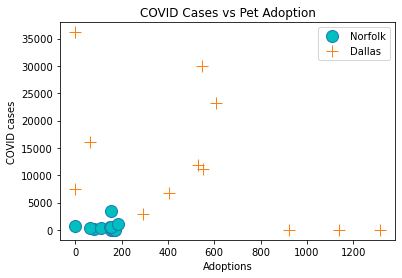

In [69]:
fig, ax = plt.subplots()
ax.margins(0.05)

ax.plot(adoption_by_month['2020'],COVID_per_month['# of Cases'], marker='o', linestyle='', ms=12, mfc="c", label='Norfolk')
ax.plot(Dallas_by_month['2020'],Dallas_per_month['cases'], marker='+', linestyle='', ms=12, mfc="m", label='Dallas')
ax.legend()

plt.xlabel("Adoptions")
plt.ylabel("COVID cases")
plt.title("COVID Cases vs Pet Adoption")

plt.savefig("COVID Cases vs Pet Adoption.png")